In [152]:
#-------------------------------
# install and load necessary libraries for data analyses
#-------------------------------
p <- c("reshape2","ggplot2","pheatmap", "cowplot")
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep=TRUE, repos="https://cloud.r-project.org/")
  suppressWarnings(suppressMessages(invisible(require(p, character.only=TRUE))))
}
invisible(lapply(p, usePackage))

In [192]:
setwd("/Users/huangshi/MyProjects/CMI-IBM/age-prediction")
outpath="./Figures/"

In [193]:
gut_sample_metadata <- "Input/gut_data/gut_4434_map.txt" # gut_data/gut_4575_rare_map.txt | oral_data/oral_2118_map.txt | skin_data/skin_2434_map.txt 
oral_sample_metadata <- "Input/oral_data/oral_2550_map.txt" # gut_data/gut_4575_rare_map.txt | oral_data/oral_2118_map.txt | skin_data/skin_2434_map.txt 
skin_sample_metadata <- "Input/skin_data/skin_1975_map.txt" # gut_data/gut_4575_rare_map.txt | oral_data/oral_2118_map.txt | skin_data/skin_2434_map.txt 
gut_metadata<-read.table(gut_sample_metadata,header=T,sep="\t",row.names=1, quote="", comment.char="")
oral_metadata<-read.table(oral_sample_metadata,header=T,sep="\t",row.names=1, quote="", comment.char="")
skin_metadata<-read.table(skin_sample_metadata,header=T,sep="\t",row.names=1, quote="", comment.char="")

In [194]:
gut_metadata<-gut_metadata[order(rownames(gut_metadata)),]
oral_metadata<-oral_metadata[order(rownames(oral_metadata)),]
skin_metadata<-skin_metadata[order(rownames(skin_metadata)),]

In [222]:
rf_all_gut<-get(load("./Output/gut_4434_by_cohort_sex_RF.reg_out/gut_4434_rf_reg_all_res.RData"))
rf_all_oral<-get(load("./Output/oral_2550_by_sex_RF.reg_out/oral_2550_rf_reg_all_res.RData"))
rf_all_skin<-get(load("./Output/skin_1975_by_site_sex_RF.reg_out/skin_1975_rf_reg_all_res.RData"))

## scatter plot: Predicted age VS Reported age

In [223]:
plot_obs_VS_pred <- function(y, predicted_y, prefix, target_field, span=1, outdir="./"){
  df<-data.frame(y, predicted_y)
  p<-ggplot(df, aes(x=y, y=predicted_y))+
    ylab(paste("Predicted ",target_field,sep=""))+
    xlab(paste("Reported ",target_field,sep=""))+
    geom_point(alpha=0.1)+
    geom_smooth(method="loess",span=span)+
    theme_bw()+ #theme_classic() +
    theme(
        axis.title = element_text(size=18),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"), panel.border = element_blank())
  #coord_flip()+
  ggsave(filename=paste(outdir, target_field, ".obs_vs_pred.scatterplot.pdf",sep=""), plot=p, height=4, width=4)
  sink(paste(outdir, target_field, ".obs_vs_pred.results.xls",sep=""));cat("\t");write.table(df, quote=FALSE,sep="\t");sink()
  invisible(p)
}

### gut

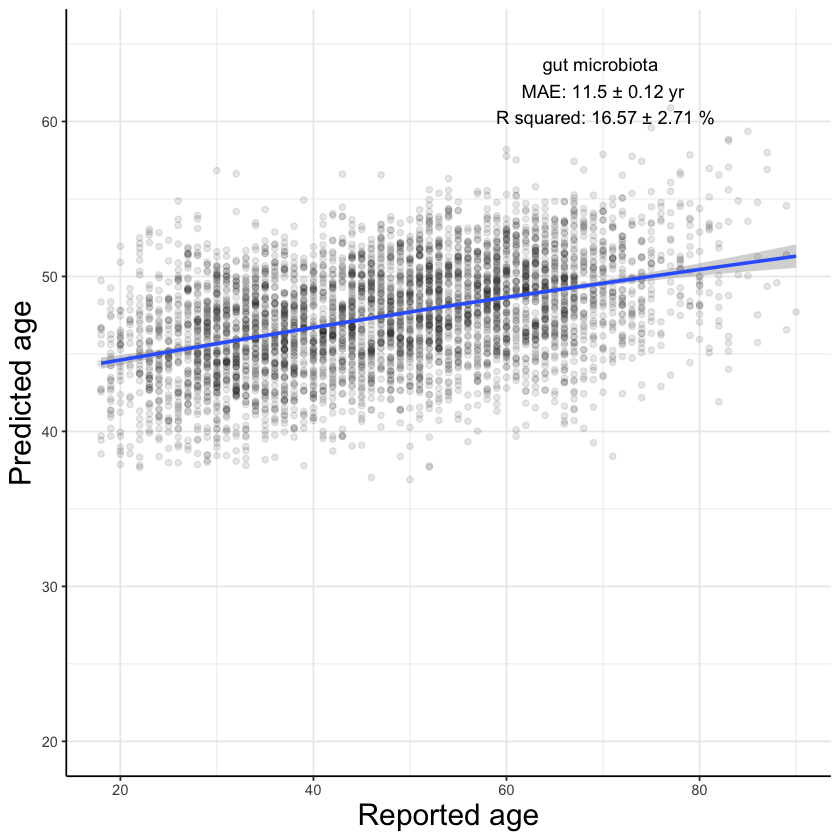

In [242]:
gut_p<-plot_obs_VS_pred(rf_all_gut$y, rf_all_gut$predicted, target_field="age", span=1, outdir = outpath)
#MAE_value<-paste(round(mean(rf_all_gut$MAE),2), " \u00b1 ", round(sd(rf_all_gut$MAE),2), sep="")
#R_squared_value<-paste(round(mean(rf_all_gut$R_squared),4)*100, " \u00b1 ", round(sd(rf_all_gut$R_squared),2)*100, "%", sep="")
MAE_value<-"11.5 ± 0.12"
R_squared_value<- "16.57 ± 2.71 %"
gut_p <-gut_p + ylim(20, 65)+ 
         annotate("text", x=70, y=62, label= paste("gut microbiota \n MAE: ", MAE_value, " yr \n R squared: ", R_squared_value, sep=""))
gut_p


### oral

In [243]:
table(is.na(oral_metadata[, "host_subject_id"]))
table(oral_metadata[, "host_subject_id"]=="")



FALSE 
 2550 


FALSE 
 2550 

In [226]:
library("dplyr")
oral_rf_all_res<-data.frame(y=rf_all_oral$y, pred_y=rf_all_oral$predicted, oral_metadata)
MAE <- function(y, pred_y){mean(sqrt((y-pred_y)^2))}
with(oral_rf_all_res, MAE(y, pred_y))
tmp<-oral_rf_all_res %>% group_by(host_subject_id) %>% 
summarise(n_samples=length(y),
          group_diff_med=median(sqrt((y-pred_y)^2)),
          group_diff_sum=sum(sqrt((y-pred_y)^2)), 
          group_MAE=median(MAE(y, pred_y)), 
          group_age=mean(y), 
          group_pred_age=mean(pred_y))
median(tmp$group_MAE)
mean(tmp$group_diff_sum)
MAE(tmp$group_age, tmp$group_pred_age)
weighted.mean(tmp$group_diff_sum, tmp$n_samples)
weighted.mean(tmp$group_diff_med, tmp$n_samples)

[1] 4.897167

[1] 9.38956

[1] 17.24831

[1] 11.10358

[1] 61.75474

[1] 4.694123

In [227]:
rf_all_oral$MAE

[1] 4.891844 4.936751 5.074386 4.974573 5.366760

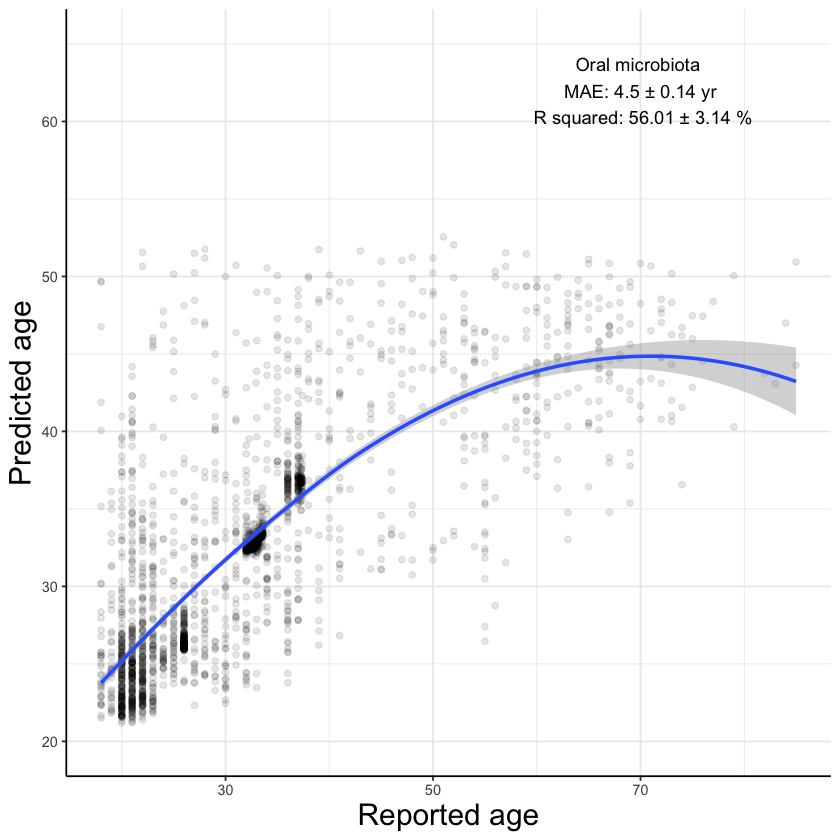

In [245]:
oral_p <-plot_obs_VS_pred(rf_all_oral$y, rf_all_oral$predicted, target_field="age", span=1, outdir = outpath)
#MAE_value<-paste(round(mean(rf_all_oral$MAE),2), " \u00b1 ", round(sd(rf_all_oral$MAE),2), sep="")
#RMSE_value<-paste(round(mean(rf_all_oral$RMSE),2), " \u00b1 ", round(sd(rf_all_oral$RMSE),2), sep="")
#R_squared_value<-paste(round(mean(rf_all_oral$R_squared),4)*100, " \u00b1 ", round(sd(rf_all_oral$R_squared),2)*100, "%", sep="")
# The metrics of the tuned model by caret
MAE_value<-"4.5 ± 0.14"
R_squared_value<- "56.01 ± 3.14 %"
oral_p <-oral_p + ylim(20, 65)+ 
         annotate("text", x=70, y=62, label= paste("Oral microbiota \n MAE: ", MAE_value, " yr \n R squared: ", R_squared_value, sep=""))
oral_p

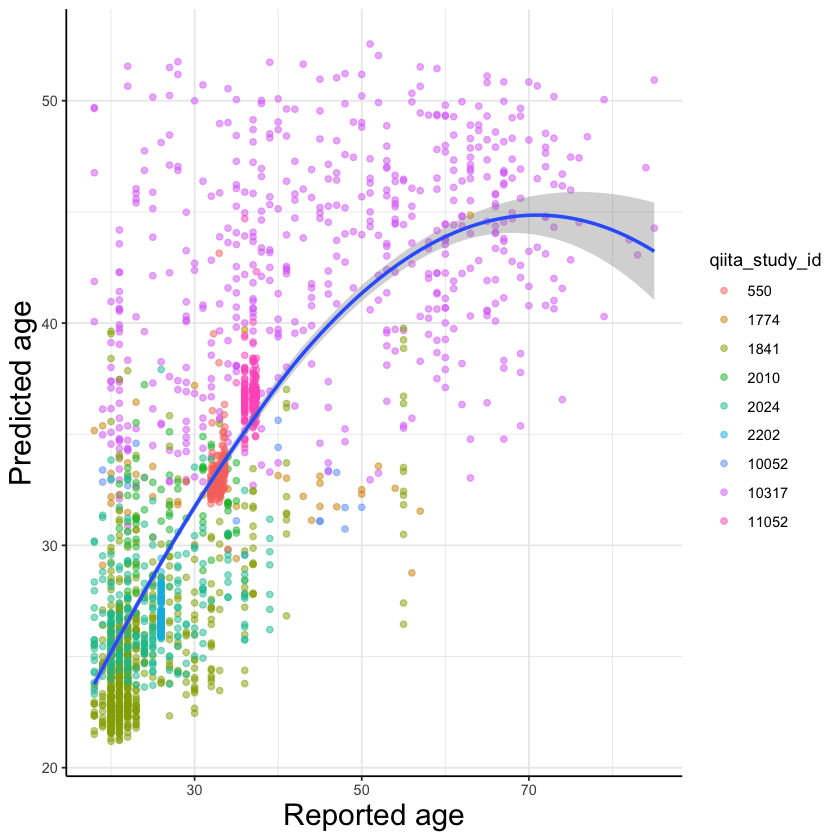

In [229]:
target_field="age"; span=1
p<-ggplot(oral_rf_all_res, aes(x=y, y=pred_y))+
    ylab(paste("Predicted ",target_field,sep=""))+
    xlab(paste("Reported ",target_field,sep=""))+
    geom_point(aes(color=as.factor(qiita_study_id)), alpha=0.5)+
    labs(color="qiita_study_id")+
    geom_smooth(method="loess",span=span)+
    theme_bw()+ #theme_classic() +
    theme(
        axis.title = element_text(size=18),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"), panel.border = element_blank())
p
outdir="./Output/oral_2594_by_sex_RF.reg_out/"
ggsave(filename=paste(outdir, target_field, ".obs_vs_pred.scatterplot_by_qiita_study_id.pdf",sep=""), plot=p, height=4, width=5)


### skin

In [230]:
dim(skin_metadata)
any(is.na(skin_metadata[, "host_subject_id"]) | skin_metadata[, "host_subject_id"]=="")
str(skin_metadata[, "host_subject_id"])

[1] 1975 1100

[1] FALSE

 Factor w/ 340 levels "00069244bd1f2b8987ec0be407f83eec727bd40dde9ff15d05497f7db0f60f551d4af74463256aae7abd00d1a3180ca506bd16e684d8593"| __truncated__,..: 246 99 185 33 38 257 98 169 277 166 ...


In [231]:
library("dplyr")
skin_rf_all_res<-data.frame(y=rf_all_skin$y, pred_y=rf_all_skin$predicted, skin_metadata)
MAE <- function(y, pred_y){mean(sqrt((y-pred_y)^2))}
with(skin_rf_all_res, MAE(y, pred_y))
tmp<-skin_rf_all_res %>% group_by(host_subject_id) %>% 
summarise(n_hosts=length(y),
          group_diff=median(sqrt((y-pred_y)^2)), 
          group_MAE=median(MAE(y, pred_y)), 
          group_age=mean(y), 
          group_pred_age=mean(pred_y))
#head(tmp)
median(tmp$group_MAE)
mean(tmp$group_diff)
weighted.mean(tmp$group_diff, 1/tmp$n_hosts)

[1] 4.861315

[1] 6.164685

[1] 8.848328

[1] 10.69097

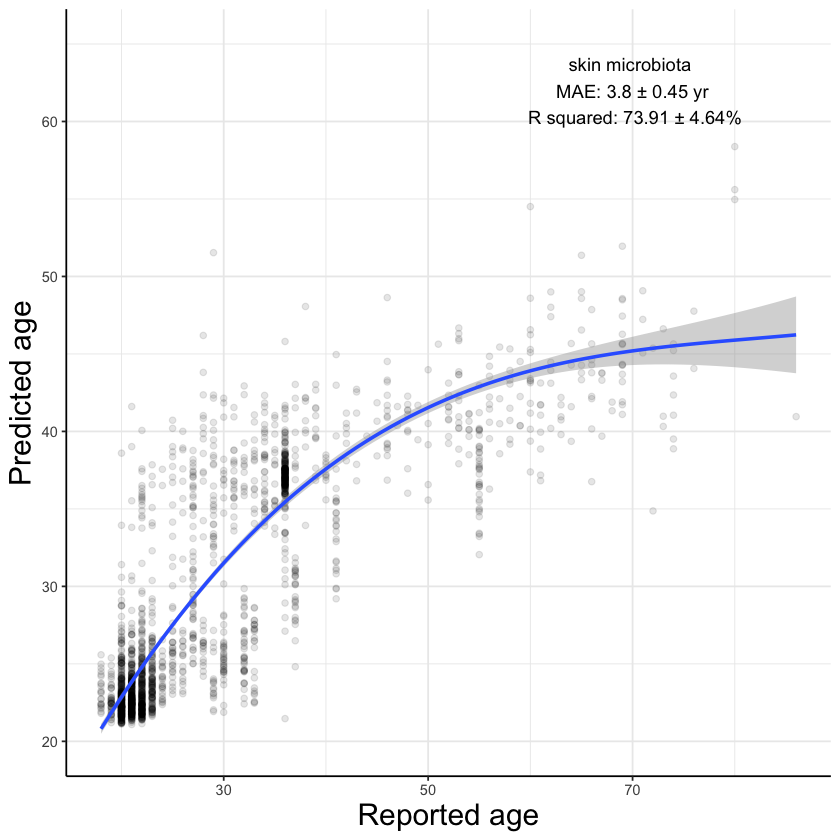

In [244]:
skin_p<-plot_obs_VS_pred(rf_all_skin$y, rf_all_skin$predicted, target_field="age", span=1, outdir = outpath)
#MAE_value<-paste(round(mean(rf_all_skin$MAE),2), " \u00b1 ", round(sd(rf_all_skin$MAE),2), sep="")
#R_squared_value<-paste(round(mean(rf_all_skin$R_squared),4)*100, " \u00b1 ", round(sd(rf_all_skin$R_squared),2)*100, "%", sep="")
MAE_value<-"3.8 ± 0.45"
R_squared_value<- "73.91 ± 4.64%"
skin_p <-skin_p + ylim(20, 65)+ 
         annotate("text", x=70, y=62, label= paste("skin microbiota \n MAE: ", MAE_value, " yr \n R squared: ", R_squared_value, sep=""))
skin_p

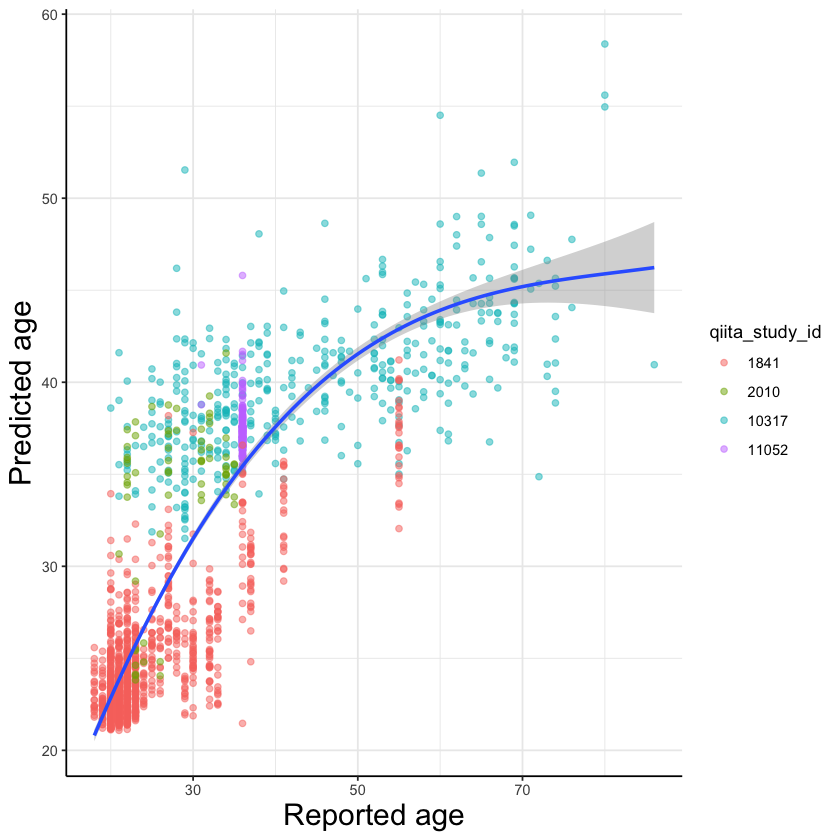

In [233]:
target_field="age"; span=1
p<-ggplot(skin_rf_all_res, aes(x=y, y=pred_y))+
    ylab(paste("Predicted ",target_field,sep=""))+
    xlab(paste("Reported ",target_field,sep=""))+
    geom_point(aes(color=as.factor(qiita_study_id)), alpha=0.5)+
    labs(color="qiita_study_id")+
    geom_smooth(method="loess",span=span)+
    theme_bw()+ #theme_classic() +
    theme(
        axis.title = element_text(size=18),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"), panel.border = element_blank())
p
outdir="./Output/skin_2062_by_site_sex_RF.reg_out/"
ggsave(filename=paste(outdir, target_field, ".obs_vs_pred.scatterplot_by_qiita_study_id.pdf",sep=""), plot=p, height=4, width=5)


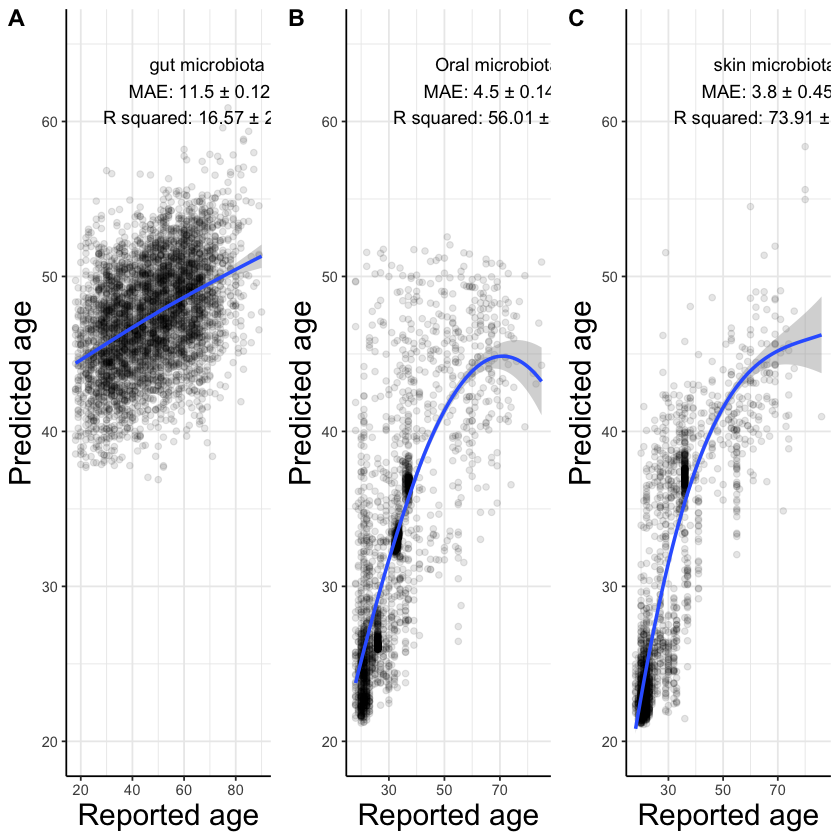

In [246]:
f1<-plot_grid(gut_p, oral_p, skin_p, rel_widths = c(1, 1, 1), ncol=3, labels="AUTO")
f1
#ggsave(filename=paste(outpath, "Figure_1ABC.pdf",sep=""), plot=f1, height=4, width=12)

In [247]:
summ_gut<-read.table("./Output/gut_4434_by_cohort_sex_RF.reg_out/crossRF_feature_selection_summ.xls", sep="\t", header=TRUE)
summ_oral<-read.table("./Output/oral_2550_by_sex_RF.reg_out/crossRF_feature_selection_summ.xls", sep="\t", header=TRUE)
summ_skin<-read.table("./Output/skin_1975_by_site_sex_RF.reg_out/crossRF_feature_selection_summ.xls", sep="\t", header=TRUE)


In [248]:
head(summ_gut)

Dataset,n_features,MSE,RMSE,MAE,MAE_perc
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
AGP_female,2,182.7447,13.51831,11.27708,0.2780934
AGP_female,4,181.4643,13.47087,11.10550,0.2730032
AGP_female,8,174.5803,13.21288,10.88025,0.2663488
AGP_female,16,170.1922,13.04577,10.75900,0.2641338
AGP_female,32,163.3214,12.77973,10.56013,0.2580919
AGP_female,64,158.4798,12.58888,10.38411,0.2537389


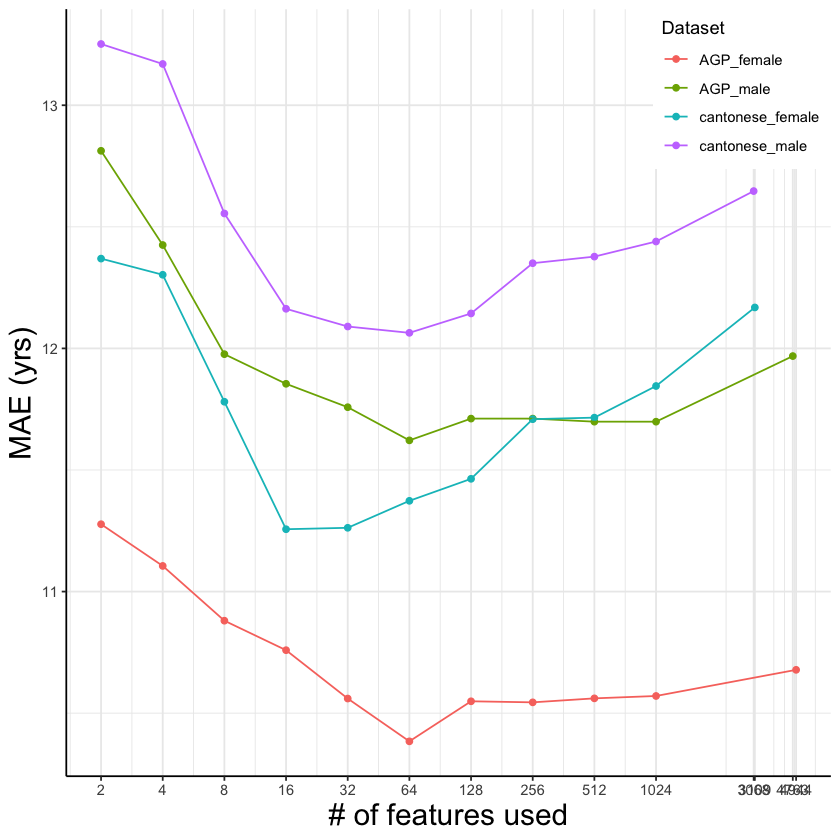

In [249]:
breaks<-unique(summ_gut$n_features)
gut_f_p<-ggplot(summ_gut, aes(x=n_features, y=MAE)) + 
  xlab("# of features used")+
  ylab("MAE (yrs)")+
  scale_x_continuous(trans = "log",breaks=breaks)+
  geom_point(aes(color=Dataset)) + geom_line(aes(color=Dataset)) +#facet_wrap(~Dataset) +
  theme_bw()+
  theme(axis.line = element_line(color="black"),
        axis.title = element_text(size=18),
        strip.background = element_rect(colour = "white"), 
        panel.border = element_blank(),
        legend.position = c(1, 1), 
        legend.justification = c(1, 1))
gut_f_p
#ggsave(filename=paste(outpath,"MAE__top_rankings.scatterplot.pdf",sep=""), plot=p, width=6, height=4)

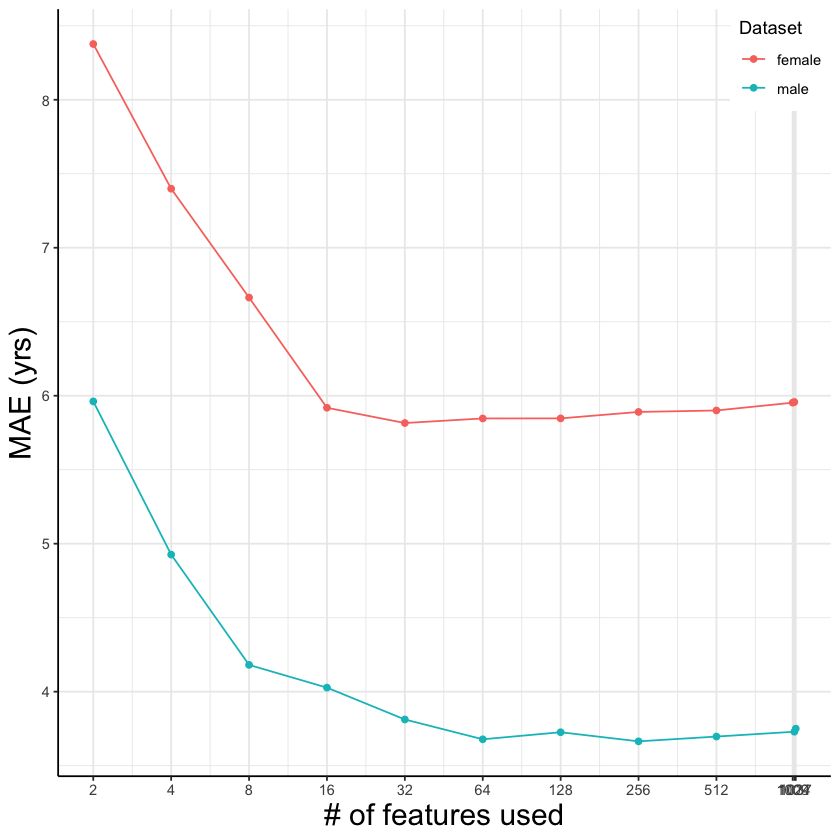

In [250]:
breaks<-unique(summ_oral$n_features)
oral_f_p<-ggplot(summ_oral, aes(x=n_features, y=MAE)) + 
  xlab("# of features used")+
  ylab("MAE (yrs)")+
  scale_x_continuous(trans = "log",breaks=breaks)+
  geom_point(aes(color=Dataset)) + geom_line(aes(color=Dataset)) +#facet_wrap(~Dataset) +
  theme_bw()+
  theme(axis.line = element_line(color="black"),
        axis.title = element_text(size=18),
        strip.background = element_rect(colour = "white"), 
        panel.border = element_blank(),
        legend.position = c(1, 1), 
        legend.justification = c(1, 1))
oral_f_p

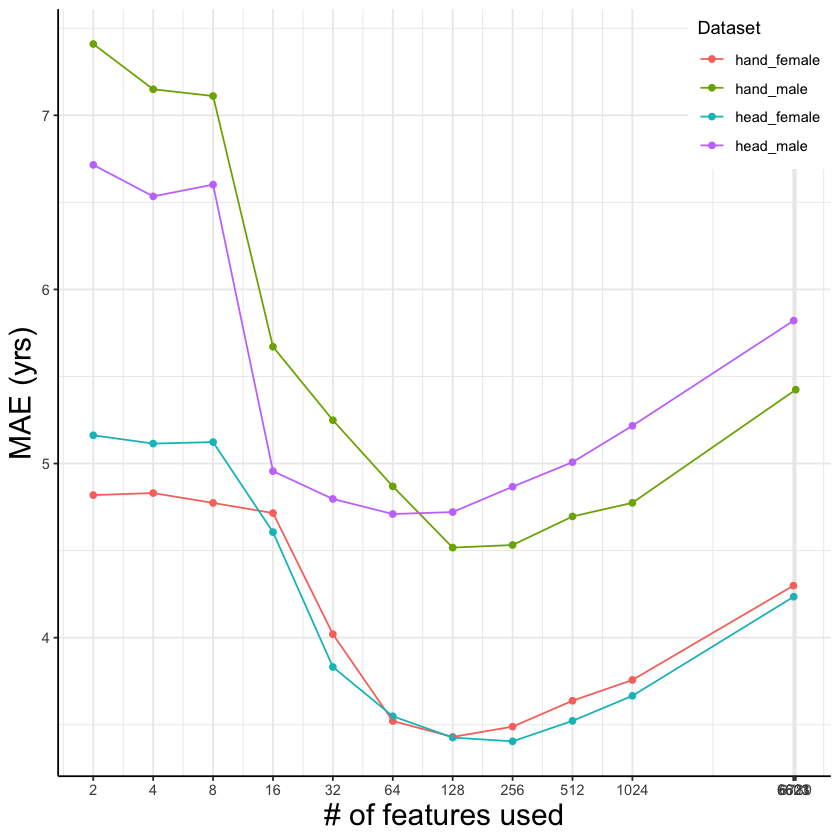

In [251]:
breaks<-unique(summ_skin$n_features)
skin_f_p<-ggplot(summ_skin, aes(x=n_features, y=MAE)) + 
  xlab("# of features used")+
  ylab("MAE (yrs)")+
  scale_x_continuous(trans = "log",breaks=breaks)+
  geom_point(aes(color=Dataset)) + geom_line(aes(color=Dataset)) +#facet_wrap(~Dataset) +
  theme_bw()+
  theme(axis.line = element_line(color="black"),
        axis.title = element_text(size=18),
        strip.background = element_rect(colour = "white"), 
        panel.border = element_blank(),
        legend.position = c(1, 1), 
        legend.justification = c(1, 1))
skin_f_p

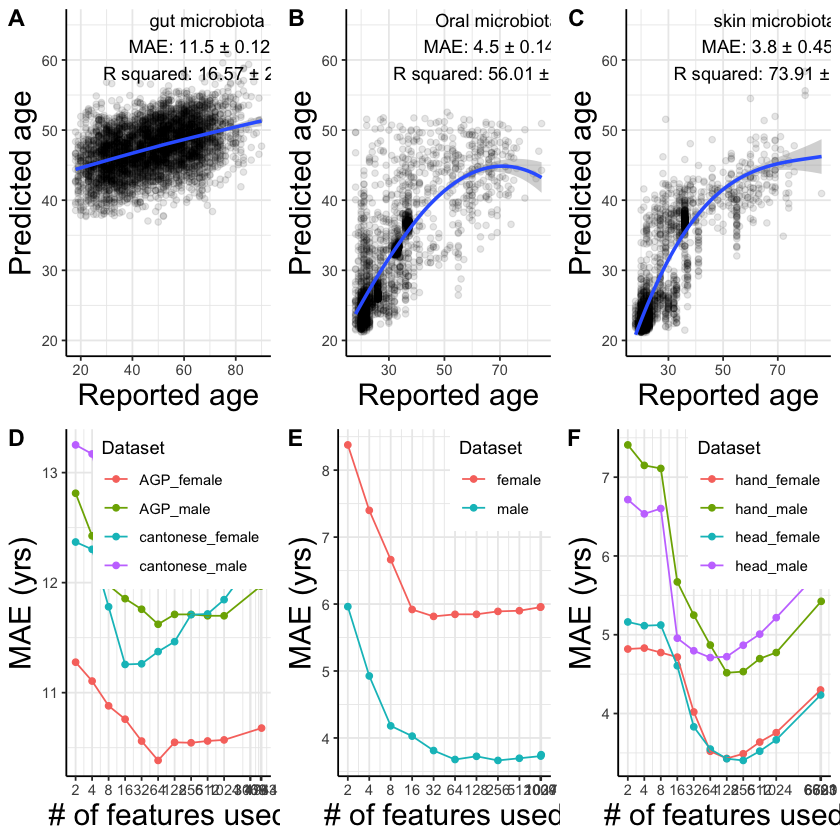

In [252]:
f1<-plot_grid(gut_p, oral_p, skin_p, gut_f_p, oral_f_p, skin_f_p, rel_widths = c(1, 1, 1), ncol=3, labels="AUTO")
f1
ggsave(filename=paste(outpath, "Figure_1.pdf",sep=""), plot=f1, height=9, width=13)

In [174]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.14.6

Matrix products: default
BLAS/LAPACK: /Users/huangshi/anaconda3/envs/r-env/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_0.8.3     cowplot_1.0.0   pheatmap_1.0.12 ggplot2_3.2.1  
[5] reshape2_1.4.3 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3         pillar_1.4.2       compiler_3.5.1     RColorBrewer_1.1-2
 [5] plyr_1.8.4         base64enc_0.1-3    tools_3.5.1        zeallot_0.1.0     
 [9] digest_0.6.22      uuid_0.1-2         jsonlite_1.6       evaluate_0.14     
[13] lifecycle_0.1.0    tibble_2.1.3       gtable_0.3.0       pkgconfig_2.0.3   
[17] rlang_0.4.1        IRdisplay_0.7.0    IRkernel_1.0.2     repr_1.0.1        
[21] withr_2.1.2        stringr_1.4.0      vctrs_0.2.0    